In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

In [3]:
pip install wordcloud

     |████████████████████████████████| 163kB 4.9MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
from PIL import Image

In [4]:
from os import path

In [5]:
# Watches Category
df = pd.read_csv('https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_Watches_v1_00.tsv.gz', sep='\t', error_bad_lines=False)
df

b'Skipping line 8704: expected 15 fields, saw 22\nSkipping line 16933: expected 15 fields, saw 22\nSkipping line 23726: expected 15 fields, saw 22\n'
b'Skipping line 85637: expected 15 fields, saw 22\n'
b'Skipping line 132136: expected 15 fields, saw 22\nSkipping line 158070: expected 15 fields, saw 22\nSkipping line 166007: expected 15 fields, saw 22\nSkipping line 171877: expected 15 fields, saw 22\nSkipping line 177756: expected 15 fields, saw 22\nSkipping line 181773: expected 15 fields, saw 22\nSkipping line 191085: expected 15 fields, saw 22\nSkipping line 196273: expected 15 fields, saw 22\nSkipping line 196331: expected 15 fields, saw 22\n'
b'Skipping line 197000: expected 15 fields, saw 22\nSkipping line 197011: expected 15 fields, saw 22\nSkipping line 197432: expected 15 fields, saw 22\nSkipping line 208016: expected 15 fields, saw 22\nSkipping line 214110: expected 15 fields, saw 22\nSkipping line 244328: expected 15 fields, saw 22\nSkipping line 248519: expected 15 fields,

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,3653882,R3O9SGZBVQBV76,B00FALQ1ZC,937001370,"Invicta Women's 15150 ""Angel"" 18k Yellow Gold ...",Watches,5,0,0,N,Y,Five Stars,Absolutely love this watch! Get compliments al...,2015-08-31
1,US,14661224,RKH8BNC3L5DLF,B00D3RGO20,484010722,Kenneth Cole New York Women's KC4944 Automatic...,Watches,5,0,0,N,Y,I love thiswatch it keeps time wonderfully,I love this watch it keeps time wonderfully.,2015-08-31
2,US,27324930,R2HLE8WKZSU3NL,B00DKYC7TK,361166390,Ritche 22mm Black Stainless Steel Bracelet Wat...,Watches,2,1,1,N,Y,Two Stars,Scratches,2015-08-31
3,US,7211452,R31U3UH5AZ42LL,B000EQS1JW,958035625,Citizen Men's BM8180-03E Eco-Drive Stainless S...,Watches,5,0,0,N,Y,Five Stars,"It works well on me. However, I found cheaper ...",2015-08-31
4,US,12733322,R2SV659OUJ945Y,B00A6GFD7S,765328221,Orient ER27009B Men's Symphony Automatic Stain...,Watches,4,0,0,N,Y,"Beautiful face, but cheap sounding links",Beautiful watch face. The band looks nice all...,2015-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960199,US,39508379,REH8UQZAXQS40,B00005OT9I,2153632,Xhilaration&#174; Silver Dial Bangle Watch,Watches,2,17,17,N,N,Great prize - but size??,It's a great watch - but you don't have a chan...,2001-12-13
960200,US,44704251,RJ14QPZEOI9P8,B00005QEM6,903687397,Armitron Men's Titanium 3 Eye Sport Analog Chr...,Watches,5,9,10,N,N,A very classy watch!,"Well worth the price. This is a light weight, ...",2001-11-08
960201,US,40571775,R2B1G5650WWFCE,B00005QEME,252821780,Men's Timex Internet Messenger Sport Watch,Watches,5,3,16,N,N,This is a great watch,"Dear Targeteers,<BR>This watch is exelent. it ...",2001-11-06
960202,US,44474855,R2MMGPUWXXOFI2,B00004YK0H,118389241,Energizer 393 Button Cell Battery,Watches,4,0,0,N,N,Now watt a minute here.,"In the old days, the common hearing battery in...",2001-04-05


In [35]:
df['product_id'].value_counts().head(60)

B000T9VK56    4390
B004YM2FV2    3050
B005JVP0LE    2047
B002SSUQFG    1945
B008D902Q2    1884
B000AR7S3A    1516
B000JQJS6M    1465
B00791QYMQ    1421
B000EQS1JW    1410
B000GAWSHM    1309
B000GAYQLI    1308
B000GAYQKY    1254
B000LTAY1U    1238
B000GAWSDG    1208
B000JQFX1G    1161
B00791R1MI    1101
B0006AAS7E    1089
B004VR9HP2    1058
B003DZDYMU    1044
B004VR9GCQ    1022
B009MA9GPE    1016
B000H6AQ0Q     974
B001AWZDA4     947
B000GB1R7S     939
B000SZPZV6     924
B000AYYIYU     916
B00093CZV0     912
B003EKIS4S     902
B000B55AEA     856
B0013HUMF2     849
B003U77NN2     839
B004VW55NA     834
B0083XFHIG     829
B003EKNMAI     818
B0006AAS5Q     808
B002Q7TUII     796
B00134JNUU     789
B00134L9B6     763
B003QFXPN0     759
B003WPUU0U     758
B001A5LKAS     743
B000AYW0KO     738
B003YJ4RYO     723
B000GAYQJ0     720
B002PAPT1S     712
B005P1C55W     686
B000SZKHNC     683
B004AOLA1A     676
B005VI37NS     669
B009KYJAJY     668
B003EKIU3W     663
B008JGW4JW     655
B001QFZWW4  

In [12]:
df.loc[df['product_id'] == 'B000T9VK56']['star_rating'].value_counts()

5    1747
4     999
3     708
1     555
2     381
Name: star_rating, dtype: int64

In [19]:
df.loc[df['product_id'] == 'B004YM2FV2'].head(60)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
69,US,207824,R2DAHAETN8AOHL,B004YM2FV2,649128875,Bling Jewelry Plated Classic Round CZ Ladies W...,Watches,5,0,0,N,Y,Five Stars,"the watch is beautiful, a little on the big si...",2015-08-31
566,US,857116,R2TQH4E3OJVAZX,B004YM2FV2,649128875,Bling Jewelry Plated Classic Round CZ Ladies W...,Watches,4,0,0,N,Y,Cute,Comes as it looks. Not perfect but good for th...,2015-08-31
670,US,1461980,R3T39I82ERSR7I,B004YM2FV2,649128875,Bling Jewelry Plated Classic Round CZ Ladies W...,Watches,1,0,0,N,Y,One Star,broke as soon as i got it,2015-08-31
676,US,1587815,R2S37AZ7GVDTVS,B004YM2FV2,649128875,Bling Jewelry Plated Classic Round CZ Ladies W...,Watches,1,0,0,N,Y,I do like the way it looks,Very cheap quality....I should have gone by th...,2015-08-31
822,US,26019636,R6BIE5QYRZNG9,B004YM2FV2,649128875,Bling Jewelry Plated Classic Round CZ Ladies W...,Watches,1,0,0,N,Y,One Star,Looks and feels like a fake watch,2015-08-31
825,US,42599762,R3LO2ZFRK699VC,B004YM2FV2,649128875,Bling Jewelry Plated Classic Round CZ Ladies W...,Watches,1,0,0,N,Y,NO STARS!!!! A piece of junk,"Worst item ever purchased, not even worth a DI...",2015-08-31
2070,US,20270839,R3K6AGX4KS25EB,B004YM2FV2,649128875,Bling Jewelry Plated Classic Round CZ Ladies W...,Watches,4,0,0,N,Y,"Great color, keeps great time, and a bit big f...",Good Find!,2015-08-29
2125,US,3963552,R1HDA5YVMK9315,B004YM2FV2,649128875,Bling Jewelry Plated Classic Round CZ Ladies W...,Watches,5,0,0,N,Y,Five Stars,Cool watch,2015-08-29
2189,US,4352811,R4Z9ZYVD8B2KF,B004YM2FV2,649128875,Bling Jewelry Plated Classic Round CZ Ladies W...,Watches,1,0,0,N,Y,dont do it,the worst purchase I have ever made,2015-08-29
2701,US,7862141,RMCIKSIJOHL1J,B004YM2FV2,649128875,Bling Jewelry Plated Classic Round CZ Ladies W...,Watches,5,0,0,N,Y,Five Stars,Good,2015-08-29


In [20]:
df.loc[df['product_id'] == 'B005JVP0LE'].head(60)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
409,US,11147380,R1GIDIWYKPUGAK,B005JVP0LE,559701518,Casio Men's Sport Analog Dive Watch,Watches,5,0,0,N,Y,Great looking simple watch. Not complicated at...,Excellent. My son loves it. He wants to swim w...,2015-08-31
770,US,35293396,RTFZV5EDWLARQ,B005JVP0LE,559701518,Casio Men's Sport Analog Dive Watch,Watches,4,0,0,N,Y,Outstanding value,I purchased this Casio watch a week ago to rep...,2015-08-31
1184,US,48976290,R3MSQPNTQPFK9K,B005JVP0LE,559701518,Casio Men's Sport Analog Dive Watch,Watches,5,0,0,N,Y,Great value,Great value! My son needed this for work and i...,2015-08-30
1188,US,36540337,R3DJWEYNT035CO,B005JVP0LE,559701518,Casio Men's Sport Analog Dive Watch,Watches,4,0,0,N,Y,Goodwatch the money,Good watch the money. Keeps me from messing up...,2015-08-30
1241,US,10301156,R2YAYLHXVBRVSS,B005JVP0LE,559701518,Casio Men's Sport Analog Dive Watch,Watches,5,0,0,N,Y,"Greatwatch, lightweight","Great watch, lightweight !! excellent.<br />I ...",2015-08-30
1425,US,132858,R3I5UBWKHEN4CF,B005JVP0LE,559701518,Casio Men's Sport Analog Dive Watch,Watches,5,0,0,N,Y,Five Stars,just what I wanted,2015-08-30
2173,US,10638835,R1SFGTT2C466M4,B005JVP0LE,559701518,Casio Men's Sport Analog Dive Watch,Watches,5,0,0,N,Y,This watch is a little gem for the price. ...,This watch is a little gem for the price. I bo...,2015-08-29
2195,US,45722499,R2E00F1765MW72,B005JVP0LE,559701518,Casio Men's Sport Analog Dive Watch,Watches,5,0,0,N,Y,Five Stars,easy to read great price,2015-08-29
2360,US,169759,R1TFXEPJTYDH1R,B005JVP0LE,559701518,Casio Men's Sport Analog Dive Watch,Watches,5,0,0,N,N,It looks really cool. It's going to buy it for...,It looks really cool. It's going to buy it for...,2015-08-29
2465,US,23278620,RPJC1D8ZZGPT8,B005JVP0LE,559701518,Casio Men's Sport Analog Dive Watch,Watches,3,0,0,N,Y,I found better watches at a better price,Smaller watch then I thought. I found better ...,2015-08-29


In [21]:
df.loc[df['product_id'] == 'B002SSUQFG'].head(60)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
65,US,37595973,R2NU7Y4TV3Z9Q7,B002SSUQFG,354933056,Seiko Men's SNK809 Seiko 5 Automatic Stainless...,Watches,5,0,0,N,Y,Five Stars,"Man watch for woman, just a right size and des...",2015-08-31
780,US,21005490,R3JFUP4ZFPHLZ8,B002SSUQFG,354933056,Seiko Men's SNK809 Seiko 5 Automatic Stainless...,Watches,1,0,6,N,N,This watch will not allow for second hand sett...,This watch will not allow for second hand sett...,2015-08-31
3392,US,51934554,R1HF9E339F2S8B,B002SSUQFG,354933056,Seiko Men's SNK809 Seiko 5 Automatic Stainless...,Watches,5,0,0,N,Y,Five Stars,excellent,2015-08-28
4318,US,3016894,R19GB355WR8XGW,B002SSUQFG,354933056,Seiko Men's SNK809 Seiko 5 Automatic Stainless...,Watches,5,0,0,N,Y,Great watch for the money,Great watch for the money. Made really nice an...,2015-08-27
4593,US,10567789,R39H8O57WU71GF,B002SSUQFG,354933056,Seiko Men's SNK809 Seiko 5 Automatic Stainless...,Watches,4,0,0,N,Y,Good watch,Usually runs a few minutes behind at the end o...,2015-08-27
5193,US,41846621,R2FQNJ476N6QB7,B002SSUQFG,354933056,Seiko Men's SNK809 Seiko 5 Automatic Stainless...,Watches,4,0,0,N,Y,"Seiko 5, enough said.",Nice automatic for the price. As always with S...,2015-08-26
5503,US,536494,RX0RJHW64C0SI,B002SSUQFG,354933056,Seiko Men's SNK809 Seiko 5 Automatic Stainless...,Watches,5,0,0,N,Y,Five Stars,I love it,2015-08-26
5568,US,6661865,R2PV7A6EJL1RMY,B002SSUQFG,354933056,Seiko Men's SNK809 Seiko 5 Automatic Stainless...,Watches,4,1,1,N,Y,Great watch. It's a perfect size and hasn't le...,Great watch. It's a perfect size and hasn't le...,2015-08-26
5906,US,2905296,R1C2R04WWHZRLQ,B002SSUQFG,354933056,Seiko Men's SNK809 Seiko 5 Automatic Stainless...,Watches,5,0,0,N,Y,I wish it'd lasted longer,This watch is superb. I was in the market for...,2015-08-26
6240,US,32492130,R3BZKFWP1TQRE8,B002SSUQFG,354933056,Seiko Men's SNK809 Seiko 5 Automatic Stainless...,Watches,4,0,0,N,Y,Affordable automatic,Great starter auto. Keeps reasonably accurate ...,2015-08-25


In [22]:
df.loc[df['product_id'] == 'B008D902Q2'].head(60)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
400,US,24195181,RNO8AU6K43WN6,B008D902Q2,308184030,U.S. Polo Assn. Sport Men's US9061 Watch with ...,Watches,5,0,0,N,Y,Cheap but looks expensive.,OK so I have had this watch for a few days now...,2015-08-31
627,US,2710261,R3N4OBVP6IRJ3S,B008D902Q2,308184030,U.S. Polo Assn. Sport Men's US9061 Watch with ...,Watches,5,0,0,N,Y,Five Stars,excelente,2015-08-31
776,US,1498730,R3J438GYKPKVL5,B008D902Q2,308184030,U.S. Polo Assn. Sport Men's US9061 Watch with ...,Watches,1,0,0,N,Y,Bad quality,The strap of the watch was cut after using the...,2015-08-31
865,US,3006311,R21GUSP9DGJLZG,B008D902Q2,308184030,U.S. Polo Assn. Sport Men's US9061 Watch with ...,Watches,1,0,0,N,Y,this is really good looking watch and i can gi...,this is really good looking watch and i can gi...,2015-08-31
1135,US,41317023,R3FGV793KG9RU2,B008D902Q2,308184030,U.S. Polo Assn. Sport Men's US9061 Watch with ...,Watches,1,5,5,N,Y,One Star,"Leather belt broke as shown in the paint , two...",2015-08-30
1581,US,389585,R43DRAP8MDS51,B008D902Q2,308184030,U.S. Polo Assn. Sport Men's US9061 Watch with ...,Watches,5,0,0,N,Y,Five Stars,Love it and keeping it.,2015-08-30
1766,US,2329550,R9A3KMHHZM8PG,B008D902Q2,308184030,U.S. Polo Assn. Sport Men's US9061 Watch with ...,Watches,5,0,0,N,Y,Five Stars,excelente,2015-08-30
2224,US,7862141,R2P4W42YDEI2O3,B008D902Q2,308184030,U.S. Polo Assn. Sport Men's US9061 Watch with ...,Watches,5,0,0,N,Y,Five Stars,Good,2015-08-29
2333,US,15890095,R3ER403IA4E9G2,B008D902Q2,308184030,U.S. Polo Assn. Sport Men's US9061 Watch with ...,Watches,4,0,0,N,Y,Four Stars,This product is very nice and the service too.,2015-08-29
2389,US,3969382,R22TIZLE0GYEIJ,B008D902Q2,308184030,U.S. Polo Assn. Sport Men's US9061 Watch with ...,Watches,5,0,0,N,Y,Five Stars,Very good...,2015-08-29


### Word Clouds by Star Rating

In [6]:
df['review_fulltext'] = df['review_headline'] + '. ' + df['review_body']


In [25]:
# separate reviews by star rating & grab all text fields & smush together
def get_review_text(sentence):
    return sentence


In [ ]:
reviews_5_smushed


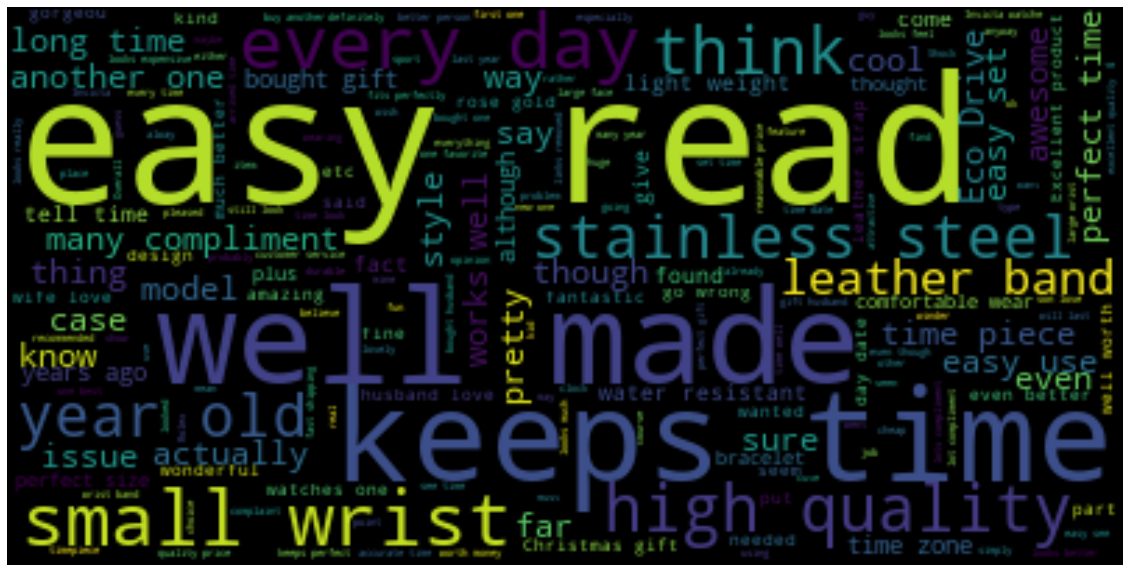

In [42]:
# Creating a list of "positive" stopwords, not to include in the cloud
stopwords = set(STOPWORDS)
stopwords.update(["watch", "br", "Five", "Star", "good", "old", "year", "way", "say", "great", "happy", "nice", "stars", "Love", "used", "problem", "second", "highly", "recommend"])
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords).generate(reviews_5_smushed)
# Display the generated image:
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

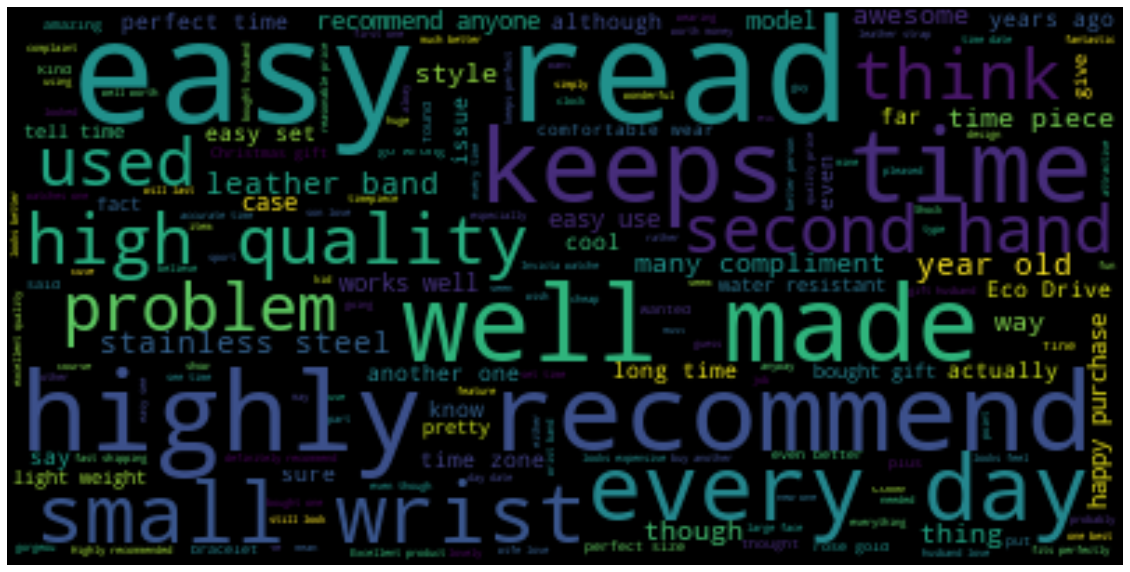

In [38]:
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [7]:
# 1 star reviews and headlines for generating word cloud
reviews_1_stars = df.loc[df['star_rating'] == 1]['review_fulltext']
reviews_1_smushed = reviews_1_stars.str.cat(sep='')


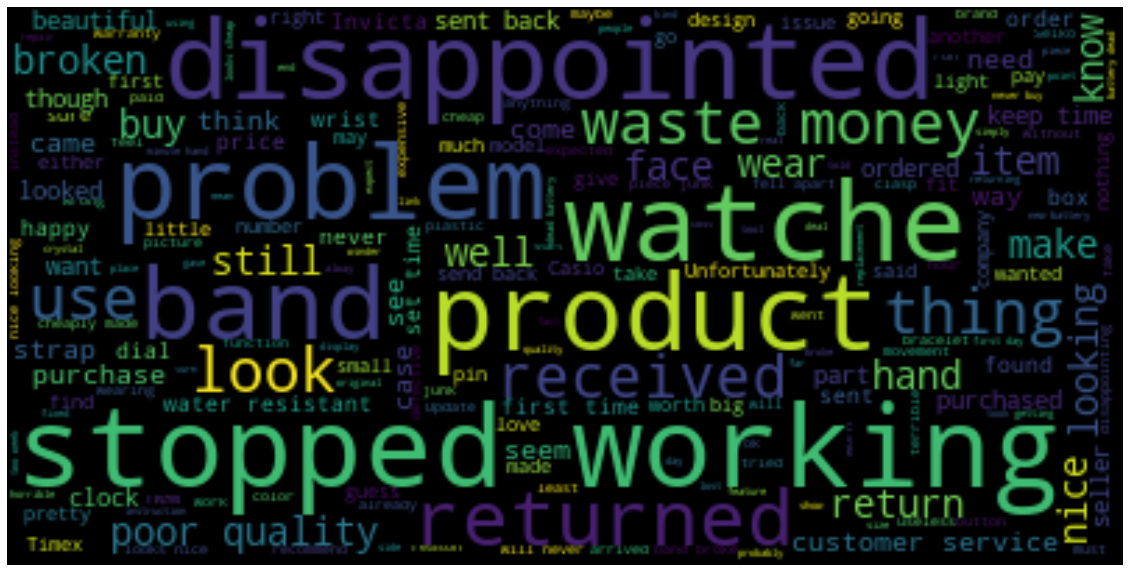

In [56]:
# Creating a list of "negative" stopwords, not to include in the cloud
stopwords = set(STOPWORDS)
stopwords.update(["watche", "watch", "really", "even", "amazon", "used", "review", "say", "great", "br", "Star", "stars", "work", "got", "good", "bad", "watc he", "wat che", " watche", "watche ", "thought", "bought", "second", "something", "actually", "one", "now", "put"])
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords).generate(reviews_1_smushed)
# Display the generated image:
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
# 3 star reviews and headlines for generating word cloud
reviews_3_stars = df.loc[df['star_rating'] == 3]['review_fulltext']
reviews_3_smushed = reviews_3_stars.str.cat(sep='')


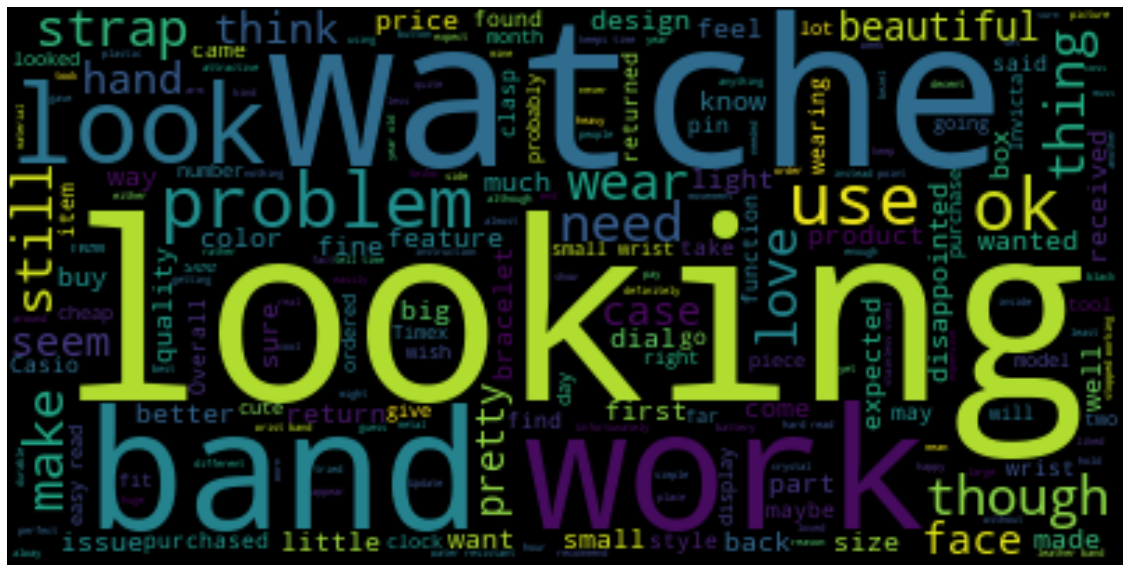

In [64]:
# Creating a list of "negative" stopwords, not to include in the cloud
stopwords = set(STOPWORDS)
stopwords.update(["watche", "WATCHe", "okay", "nice", "watch", "really", "look", "even", "amazon", "used", "review", "say", "great", "br", "Star", "stars", "got", "good", "bad", "watc he", "wat che", " watche", "watche ", "thought", "bought", "second", "something", "actually", "three", "one", "now", "put"])
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords).generate(reviews_3_smushed)
# Display the generated image:
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Train Test Split

In [7]:
df_new = df[['star_rating', 'review_fulltext']]

In [13]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960204 entries, 0 to 960203
Data columns (total 2 columns):
star_rating        960204 non-null int64
review_fulltext    960049 non-null object
dtypes: int64(1), object(1)
memory usage: 14.7+ MB


In [8]:
df_new.isna().any()

star_rating        False
review_fulltext     True
dtype: bool

In [9]:
# reviews_1_stars.isna().any(
df_new = df_new.dropna()

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df_new.loc[:, 'review_fulltext']
y = df_new.loc[:, 'star_rating']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

### Tokenizing

In [13]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer, sent_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [14]:
word_tokenizer = RegexpTokenizer(r'\w+')

In [15]:
#split each row into a list and remove punctuation. 
X_train = X_train.map(lambda x: word_tokenizer.tokenize(x.lower()))

In [16]:
#split each row into a list and remove punctuation. 
X_test = X_test.map(lambda x: word_tokenizer.tokenize(x.lower()))

In [23]:
X_train.head()

819596    [nice, time, very, nice, comfortable, watch, a...
635218    [this, is, wonderful, i, truly, find, this, st...
746389    [great, item, this, was, a, present, and, he, ...
542879    [pocket, watch, day, and, date, tow, tone, thi...
643829    [bold, beautiful, too, early, to, say, if, it,...
Name: review_fulltext, dtype: object

In [17]:
# rejoin list of tokenized words into single string for each row
X_train = X_train.map(lambda x: ' '.join(x))

In [18]:
X_test = X_test.map(lambda x: ' '.join(x))

In [26]:
X_train.head()

819596    nice time very nice comfortable watch and the ...
635218    this is wonderful i truly find this style of w...
746389    great item this was a present and he loves it ...
542879    pocket watch day and date tow tone this was a ...
643829    bold beautiful too early to say if it rates 5 ...
Name: review_fulltext, dtype: object

In [23]:
y.value_counts(normalize = True)

5    0.594832
4    0.179950
1    0.088652
3    0.082396
2    0.054170
Name: star_rating, dtype: float64

In [19]:
# create our training data list - this is a list of strings, with each string being a post title

clean_train_data = []

for traindata in X_train:
    clean_train_data.append(traindata)

In [20]:
# create test data list

clean_test_data = []

for testdata in X_test:
    clean_test_data.append(testdata)

### Count Vectorizer

In [21]:
# instantiate our CountVectorizer. This counts the number of appearances of all the words in our training data and
# eliminates common english stop words. 5000 max features works well for our purposes (tested various numbers). Our
# data is already preprocessed and tokenized manually earlier. ngram_range is 1,3, although all or nearly all our 
# features are single words

vectorizer = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = 'english',
                             max_features = 5000,
                             ngram_range = (1, 3))

In [22]:
# fit our training data and test data lists to our count_vectorizer

train_data_features = vectorizer.fit_transform(clean_train_data)

test_data_features = vectorizer.transform(clean_test_data)

In [23]:
# convert to array

train_data_features = train_data_features.toarray()

In [24]:
# check shapes

train_data_features.shape, test_data_features.shape

((720036, 5000), (240013, 5000))

In [25]:
# I wanted check that the features corpus was as expected - removed print statement for readability

vocab = vectorizer.get_feature_names()

In [26]:
vocab[0:200]

['00',
 '00 watch',
 '000',
 '10',
 '10 15',
 '10 minutes',
 '10 seconds',
 '10 year',
 '10 year battery',
 '10 year old',
 '10 years',
 '100',
 '1000',
 '100m',
 '11',
 '12',
 '12 clock',
 '12 hours',
 '120',
 '13',
 '14',
 '15',
 '15 minutes',
 '15 years',
 '150',
 '16',
 '17',
 '18',
 '18mm',
 '19',
 '1st',
 '20',
 '20 minutes',
 '20 years',
 '200',
 '200m',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '20mm',
 '21',
 '22',
 '22mm',
 '23',
 '24',
 '24 hour',
 '24 hours',
 '25',
 '250',
 '26',
 '28',
 '29',
 '2nd',
 '30',
 '30 days',
 '30 minutes',
 '30 seconds',
 '30 years',
 '300',
 '31',
 '34',
 '34 34',
 '34 br',
 '34 watch',
 '35',
 '3rd',
 '40',
 '400',
 '40mm',
 '42mm',
 '45',
 '48',
 '4th',
 '50',
 '500',
 '5th',
 '60',
 '600',
 '70',
 '75',
 '80',
 '90',
 '95',
 '99',
 'ability',
 'able',
 'able read',
 'able wear',
 'absolute',
 'absolutely',
 'absolutely beautiful',
 'absolutely gorgeous',
 'absolutely love',
 'absolutely love watch',
 'absolutely loved',
 'absol

### Modeling - Logistic Regression 

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
# fit logistic regression model

lr = LogisticRegression(penalty = 'l2')


In [29]:
# shape check

train_data_features.shape, y_train.shape

((720036, 5000), (720036,))

In [30]:
lr.fit(train_data_features, y_train)

/Users/jillcarrie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jillcarrie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
lr.score(train_data_features, y_train)

0.7154156181079835

In [32]:
lr.score(test_data_features, y_test)

0.7080116493689925

In [48]:
y_train_pred = lr.predict(train_data_features)
y_test_pred = lr.predict(test_data_features)

In [58]:
import pickle

pickle.dump( lr, open( "save.lr", "wb" ) )
pickle.dump( test_data_features, open( "save.tdf", "wb" ) )
pickle.dump( y_test, open( "save.yt", "wb" ) )

In [43]:
%run ../python_files/visualizations

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/Users/jillcarrie/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/__init__.py)

In [37]:
lr_pickled = pickle.load( open( "save.lr", "rb" ) )

In [38]:
lr_pickled.score(test_data_features, y_test)

0.7080116493689925

In [44]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [56]:
def plot_confusion_matrix(y_true, y_pred, 
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[ 16520   1023    849    510   2386]
 [  4162   1665   2074   1086   3801]
 [  1989   1116   4311   3966   8313]
 [   696    330   1820  10412  29925]
 [   594    169    648   4624 137024]]
Normalized confusion matrix
[[0.78 0.05 0.04 0.02 0.11]
 [0.33 0.13 0.16 0.08 0.3 ]
 [0.1  0.06 0.22 0.2  0.42]
 [0.02 0.01 0.04 0.24 0.69]
 [0.   0.   0.   0.03 0.96]]


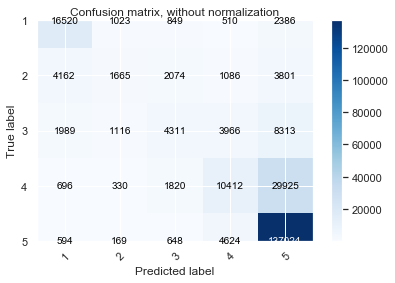

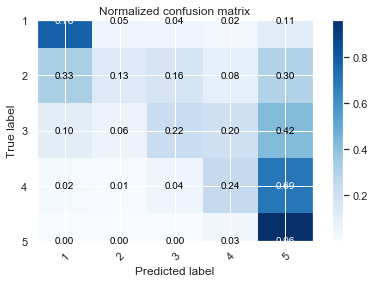

In [57]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_test_pred, 
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_test_pred, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [62]:
np.set_printoptions(precision=2)
class_names = [1,2,3,4,5]

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(lr, train_data_features, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues, normalize=True)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

TypeError: plot_confusion_matrix() got an unexpected keyword argument 'display_labels'

In [ ]:
show_confusion_matrix(lr, X_train_resampled, y_train_resampled, title='Logistic Regression - Training Set (Normalized)')

In [ ]:
class_names = iris.target_names
class_names = iris.target_names

### Feature comparison

In [33]:
coef_list = lr.coef_.tolist()

In [34]:
coef_list = coef_list[0]

In [35]:
coef_df = pd.DataFrame({'features' : vectorizer.get_feature_names(),
                       'coefs' : coef_list})

In [36]:
coef_df.sort_values(by = ['coefs'])

,features,coefs
3822,star rating,-3.618041
1371,excelente,-3.144826
3824,stars,-3.002372
3841,stars good,-2.621590
4873,won disappointed,-2.518937
...,...,...
1627,garbage,1.647947
2106,junk,1.758984
4670,watch stars,2.157017
1668,given stars,2.316364


In [38]:
stopwords = set(STOPWORDS)
stopwords.update(['star', 'stars'])


In [39]:
vectorizer = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = stopwords,
                             max_features = 5000,
                             ngram_range = (1, 3))

train_data_features = vectorizer.fit_transform(clean_train_data)

test_data_features = vectorizer.transform(clean_test_data)

train_data_features = train_data_features.toarray()

train_data_features.shape, test_data_features.shape

/Users/jillcarrie/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


((720036, 5000), (240013, 5000))

In [40]:
lr.fit(train_data_features, y_train)

/Users/jillcarrie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jillcarrie/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
lr.score(train_data_features, y_train)

0.758498186201801

In [42]:
lr.score(test_data_features, y_test)

0.7486052838804564

### Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
tree = DecisionTreeClassifier()

In [ ]:
tree.fit(train_data_features, y_train)

In [ ]:
tree.score(train_data_features, y_train)

In [ ]:
tree.score(test_data_features, y_test)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier(n_estimators = 100)

In [ ]:
forest.fit(train_data_features, y_train)

In [ ]:
forest.score(train_data_features, y_train)

In [ ]:
forest.score(test_data_features, y_test)

In [72]:
df.loc[df['star_rating'] == 1]['review_fulltext'].head(60)

7      I was about to buy this thinking it was a .......
11     I do not think this watch is a good product. D...
37                                        One Star. crap
41     poor quality. Metal color was changed after th...
53     One Star. It was bad it didnt fit my 22mm retr...
73     Leaks water - total junk. This is junk.  Why w...
74               One Star. Lens cracked on the third day
87     Disappointed by the huge size of it. Disappoin...
104    Ugly !. It is so cheap and gaudy, I will never...
107                                One Star. Didn't like
110    Didn't last long.. Stopped working after one w...
115    Terrible band, and don't think you can replace...
117    Buy this watch if you want a green wrist. Don'...
121    One Star. Battery or watch died less than 2 da...
139                 One Star. work for a week dont broke
145    Faulty product and not worth your money. Horri...
151    Cap/screw that holds pin fell off!. After two ...
156    Stopped working. This wa

In [71]:
df.loc[df['product_id'] == 'B008D902Q2'].head(60)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,review_fulltext
400,US,24195181,RNO8AU6K43WN6,B008D902Q2,308184030,U.S. Polo Assn. Sport Men's US9061 Watch with ...,Watches,5,0,0,N,Y,Cheap but looks expensive.,OK so I have had this watch for a few days now...,2015-08-31,Cheap but looks expensive.. OK so I have had t...
627,US,2710261,R3N4OBVP6IRJ3S,B008D902Q2,308184030,U.S. Polo Assn. Sport Men's US9061 Watch with ...,Watches,5,0,0,N,Y,Five Stars,excelente,2015-08-31,Five Stars. excelente
776,US,1498730,R3J438GYKPKVL5,B008D902Q2,308184030,U.S. Polo Assn. Sport Men's US9061 Watch with ...,Watches,1,0,0,N,Y,Bad quality,The strap of the watch was cut after using the...,2015-08-31,Bad quality. The strap of the watch was cut af...
865,US,3006311,R21GUSP9DGJLZG,B008D902Q2,308184030,U.S. Polo Assn. Sport Men's US9061 Watch with ...,Watches,1,0,0,N,Y,this is really good looking watch and i can gi...,this is really good looking watch and i can gi...,2015-08-31,this is really good looking watch and i can gi...
1135,US,41317023,R3FGV793KG9RU2,B008D902Q2,308184030,U.S. Polo Assn. Sport Men's US9061 Watch with ...,Watches,1,5,5,N,Y,One Star,"Leather belt broke as shown in the paint , two...",2015-08-30,One Star. Leather belt broke as shown in the p...
1581,US,389585,R43DRAP8MDS51,B008D902Q2,308184030,U.S. Polo Assn. Sport Men's US9061 Watch with ...,Watches,5,0,0,N,Y,Five Stars,Love it and keeping it.,2015-08-30,Five Stars. Love it and keeping it.
1766,US,2329550,R9A3KMHHZM8PG,B008D902Q2,308184030,U.S. Polo Assn. Sport Men's US9061 Watch with ...,Watches,5,0,0,N,Y,Five Stars,excelente,2015-08-30,Five Stars. excelente
2224,US,7862141,R2P4W42YDEI2O3,B008D902Q2,308184030,U.S. Polo Assn. Sport Men's US9061 Watch with ...,Watches,5,0,0,N,Y,Five Stars,Good,2015-08-29,Five Stars. Good
2333,US,15890095,R3ER403IA4E9G2,B008D902Q2,308184030,U.S. Polo Assn. Sport Men's US9061 Watch with ...,Watches,4,0,0,N,Y,Four Stars,This product is very nice and the service too.,2015-08-29,Four Stars. This product is very nice and the ...
2389,US,3969382,R22TIZLE0GYEIJ,B008D902Q2,308184030,U.S. Polo Assn. Sport Men's US9061 Watch with ...,Watches,5,0,0,N,Y,Five Stars,Very good...,2015-08-29,Five Stars. Very good...


In [69]:
reviews_1_stars.head(60)

7      I was about to buy this thinking it was a .......
11     I do not think this watch is a good product. D...
37                                        One Star. crap
41     poor quality. Metal color was changed after th...
53     One Star. It was bad it didnt fit my 22mm retr...
73     Leaks water - total junk. This is junk.  Why w...
74               One Star. Lens cracked on the third day
87     Disappointed by the huge size of it. Disappoin...
104    Ugly !. It is so cheap and gaudy, I will never...
107                                One Star. Didn't like
110    Didn't last long.. Stopped working after one w...
115    Terrible band, and don't think you can replace...
117    Buy this watch if you want a green wrist. Don'...
121    One Star. Battery or watch died less than 2 da...
139                 One Star. work for a week dont broke
145    Faulty product and not worth your money. Horri...
151    Cap/screw that holds pin fell off!. After two ...
156    Stopped working. This wa

count               240007
unique              225450
top       Five Stars. good
freq                   481
Name: review_fulltext, dtype: object